In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline  
np.random.seed(3)

In [13]:
data = pd.read_csv('../Data/OnlineNewsPopularity.csv')

# Data Normalization
X = data[data.columns[1:-1]]

X = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=data.columns[1:-1])
y = data[' shares']
y[y <1400] = 0
y[y >=1400] = 1


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=2)

c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [3]:
KNN = KNeighborsClassifier(n_neighbors=100,n_jobs=7)
KNN.fit(X_train, y_train)
KNN.score(X_test,y_test)

0.05153859088616109

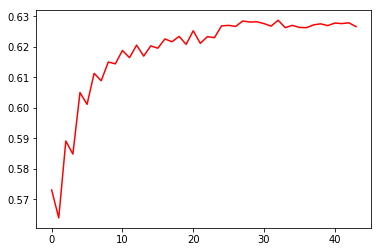

In [23]:
score_diff_neighbor = []
for i in range(1,45):
    KNN = KNeighborsClassifier(n_neighbors=i,n_jobs=6)
    KNN.fit(X_train, y_train)
    score_diff_neighbor.append(KNN.score(X_test,y_test))
plt.plot(score_diff_neighbor,'r')

In [49]:
KNN = KNeighborsClassifier(n_neighbors=10,n_jobs=6)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=6, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
algorithm = ['ball_tree','kd_tree','brute']
score_diff_alg = []
for alg in algorithm:
    startTime = datetime.now()
    for i in range(1,11): 
        KNN = KNeighborsClassifier(algorithm=alg, n_neighbors=i,n_jobs=6)
        KNN.fit(X_train, y_train)
        score_diff_alg.append(KNN.score(X_test,y_test))
    print(alg)
    print('spend time:',datetime.now()-startTime)

In [ ]:
plt.plot(score_diff_alg[:10],color = 'r', label = 'ball_tree')
plt.plot(score_diff_alg[10:20],color = 'g', label= 'kd_tree')
plt.plot(score_diff_alg[20:30],color = 'b',label = 'brute')
plt.legend(loc="best")
# plt.xticks(np.arange(len(score_diff_alg[:50])), [i for i in range(1,51)])
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbor')
plt.title('Accuracy in each Number of Neighbor')

In [25]:
weight = ['uniform','distance']
score_diff_wg = []
for wg in weight:
    for i in range(1,11): 
        KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=i,n_jobs=6,weights=wg)
        KNN.fit(X_train, y_train)
        score_diff_wg.append(KNN.score(X_test,y_test))

Text(0.5,1,'Accuracy in each Number of Neighbor')

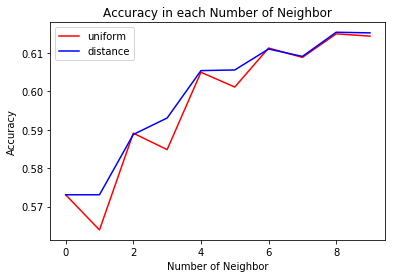

In [26]:
plt.plot(score_diff_wg[:10],color='r',label='uniform')
plt.plot(score_diff_wg[-10:],color='b',label='distance')
plt.legend(loc="best")
#plt.xticks(np.arange(len(score_diff_alg[:50])), [i for i in range(1,51)])
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbor')
plt.title('Accuracy in each Number of Neighbor')

In [ ]:
weight = ['uniform']
score_diff_p_1 = []
for wg in weight:
    for i in range(1,16): 
        KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10,n_jobs=6,weights=wg, p=i)
        KNN.fit(X_train, y_train)
        score_diff_p_1.append(KNN.score(X_test,y_test))

In [ ]:
plt.plot(score_diff_p_1,'r')

plt.xticks(np.arange(len(score_diff_p_1)), [i for i in range(1,16)])
plt.ylabel('Accuracy')
plt.xlabel('P')
plt.title('Accuracy in each P with Uniform weight')

In [28]:
weight = ['distance']
score_diff_p_2 = []
for wg in weight:
    for i in range(1,5): 
        KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10,n_jobs=6,weights=wg, p=i)
        KNN.fit(X_train, y_train)
        score_diff_p_2.append(KNN.score(X_test,y_test))

Text(0.5,1,'Accuracy in each P with Distance weight')

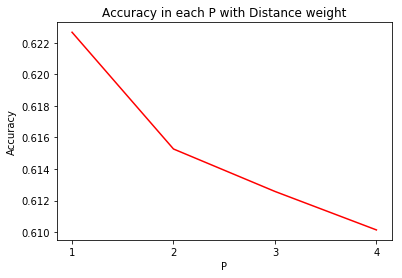

In [29]:
plt.plot(score_diff_p_2,'r')

plt.xticks(np.arange(len(score_diff_p_2)), [i for i in range(1,16)])
plt.ylabel('Accuracy')
plt.xlabel('P')
plt.title('Accuracy in each P with Distance weight')

Text(0.5,1,'Confusion Martix for KNN')

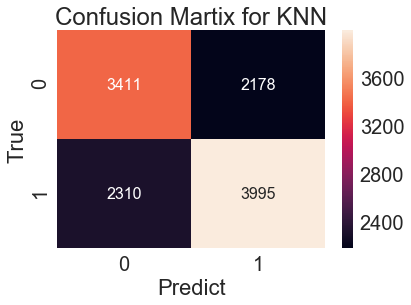

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10,n_jobs=6,weights='distance', p=1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, ['0','1'],['0','1'])
sn.set(font_scale=2)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')
ax.set_title('Confusion Martix for KNN')

In [34]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from 'c:\\users\\craig\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

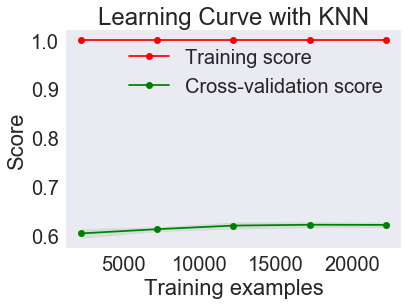

In [35]:
from sklearn.model_selection import learning_curve
KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10,n_jobs=6,weights='distance', p=1)
title = 'Learning Curve with KNN'
plot_learning_curve(KNN, title, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

In [42]:
def plot_validation_curve(train_scores, test_scores, title, xlabel, param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
#     plt.xticks(np.arange(30), [i for i in range(1,31)])
#     plt.xticks(np.arange(len(param_range)), [i for i in range(1,param_range)])
    #plt.xlim(0,31)
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

TypeError: 'list' object cannot be interpreted as an integer

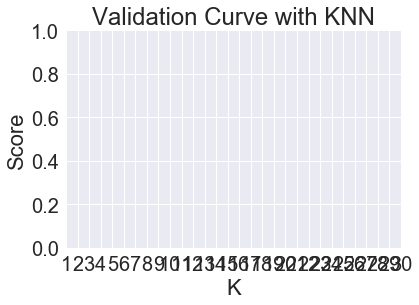

In [39]:
from sklearn.model_selection import validation_curve
KNN = KNeighborsClassifier(algorithm='ball_tree',n_jobs=6,weights='distance', p=1)

param_range = [i for i in range(1,10)]
train_scores, test_scores = validation_curve(
    KNN, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
title = "Validation Curve with KNN"
xlabel = "K"

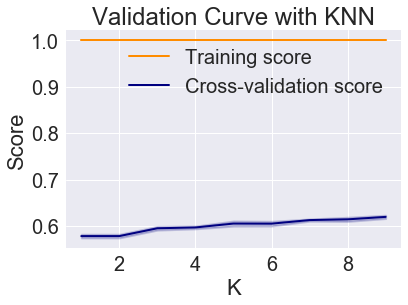

In [43]:
plot_validation_curve(train_scores, test_scores, title, xlabel, param_range)